In [1]:
import numpy as np
import pandas as pd

def neighbor_joining(df):
    # Convert the DataFrame to a numpy matrix
    dist_matrix = df.to_numpy()
    taxa = list(df.index)
    tree = {}

    while len(taxa) > 2:
        n = len(taxa)
        Q_matrix = np.zeros((n, n))
        print(n)
        
        # Compute the Q matrix
        sumi = [np.sum(dist_matrix[i]) for i in range(n)]
        
        for i in range(n):
            for j in range(n):
                if i != j:
                    Q_matrix[i][j] = (n - 2) * dist_matrix[i][j] - sumi[i] - sumi[j]
        
        # Find the pair with the smallest Q value
        min_i, min_j = np.unravel_index(np.argmin(Q_matrix), Q_matrix.shape)
        
        # Compute the distance to the new node
        new_dist = (dist_matrix[min_i][min_j] +  (sumi[min_i] - sumi[min_j]) / (n - 2)) / 2
        
        # Update the tree
        new_node = taxa[min_i] + '.' + taxa[min_j]
        tree[new_node] = {taxa[min_i]: new_dist,
                          taxa[min_j]: dist_matrix[min_i][min_j] - new_dist}
        
        # Update the distance matrix
        new_row = [(dist_matrix[min_i][k] + dist_matrix[min_j][k] - dist_matrix[min_i][min_j]) / 2 for k in range(n) if k != min_i and k != min_j]
        new_dist_matrix = np.delete(dist_matrix, [min_i, min_j], axis=0)
        new_dist_matrix = np.delete(new_dist_matrix, [min_i, min_j], axis=1)
        new_dist_matrix = np.vstack((new_dist_matrix, new_row))
        new_row.append(0)
        new_dist_matrix = np.column_stack((new_dist_matrix, new_row))
        
        # Update the taxa list
        new_taxa = taxa[:]
        new_taxa.remove(taxa[min_i])
        new_taxa.remove(taxa[min_j])
        new_taxa.append(new_node)
        
        # Update the distance matrix and taxa list
        dist_matrix = new_dist_matrix
        taxa = new_taxa
        
    # Connect the final two nodes
    tree[taxa[1]][taxa[0]] = dist_matrix[0, 1]
    
    return tree

In [2]:
sufix = '-v3'
RAW_PATH = '../examples/logs/phylo%s/DiseasePhyloReports.tsv'%sufix
raw_data = pd.read_csv(RAW_PATH, sep = "\t|,", engine='python')
infectious_data = raw_data[raw_data['diseaseStatus'] == 'Infectious'].reset_index()
name = []
for seq in infectious_data['diseaseSeq']:
    name.append(seq.split('.')[-1])
dm = np.load('dm-v3.npy')
df = pd.DataFrame(data = dm, index=name, columns=name)

In [3]:
# Randomly Select
import random
random.seed(0)
selected_rows = [i for i in range(len(infectious_data)) if random.random()<0.05]
selected_names = []
for i in selected_rows:
    name = infectious_data.iloc[i]['diseaseSeq']
    selected_names.append(name.split('.')[-1])
print(len(selected_names))
df = df[df.index.isin(selected_names)]
df = df[selected_names]
df

255


,3287-1,3555-1,3927-1,3120-1,4919-1,4650-1,2691-1,2610-1,4093-1,2434-1,...,1391-1,1577-1,1314-1,2753-1,1591-1,951-1,3141-1,4593-1,2849-1,2732-1
3287-1,0.000000,0.500000,0.800000,1.000000,1.000000,1.0,0.857143,0.800000,1.000000,0.833333,...,1.0,1.000000,0.800000,0.909091,0.916667,0.916667,0.909091,0.909091,1.000000,0.909091
3555-1,0.500000,0.000000,0.800000,1.000000,1.000000,1.0,0.857143,0.800000,1.000000,0.833333,...,1.0,1.000000,0.800000,0.909091,0.916667,0.916667,0.909091,0.909091,1.000000,0.909091
3927-1,0.800000,0.800000,0.000000,1.000000,1.000000,1.0,0.666667,0.800000,1.000000,0.833333,...,1.0,1.000000,0.909091,0.909091,0.916667,0.818182,0.909091,0.909091,1.000000,0.909091
3120-1,1.000000,1.000000,1.000000,0.000000,0.714286,1.0,1.000000,1.000000,0.714286,1.000000,...,1.0,0.818182,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.846154,1.000000
4919-1,1.000000,1.000000,1.000000,0.714286,0.000000,1.0,1.000000,1.000000,0.400000,1.000000,...,1.0,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.727273,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951-1,0.916667,0.916667,0.818182,1.000000,1.000000,1.0,0.846154,0.916667,1.000000,0.923077,...,1.0,1.000000,0.944444,0.944444,0.947368,0.000000,0.944444,0.944444,1.000000,0.944444
3141-1,0.909091,0.909091,0.909091,1.000000,1.000000,1.0,0.923077,0.909091,1.000000,0.916667,...,1.0,1.000000,0.941176,0.941176,0.944444,0.944444,0.000000,0.200000,1.000000,0.363636
4593-1,0.909091,0.909091,0.909091,1.000000,1.000000,1.0,0.923077,0.909091,1.000000,0.916667,...,1.0,1.000000,0.941176,0.941176,0.944444,0.944444,0.200000,0.000000,1.000000,0.363636
2849-1,1.000000,1.000000,1.000000,0.846154,0.727273,1.0,1.000000,1.000000,0.727273,1.000000,...,1.0,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000


In [4]:
result_tree = neighbor_joining(df)
np.save('sp-lr-treedict-v3.npy',result_tree)

255
254
253
252
251
250
249
248
247
246
245
244
243
242
241
240
239
238
237
236
235
234
233
232
231
230
229
228
227
226
225
224
223
222
221
220
219
218
217
216
215
214
213
212
211
210
209
208
207
206
205
204
203
202
201
200
199
198
197
196
195
194
193
192
191
190
189
188
187
186
185
184
183
182
181
180
179
178
177
176
175
174
173
172
171
170
169
168
167
166
165
164
163
162
161
160
159
158
157
156
155
154
153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
122
121
120
119
118
117
116
115
114
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3


In [5]:
from Bio import Phylo
from Bio.Phylo import PhyloXML
from Bio.Phylo.Newick import Tree, Clade

def build_clade(node, tree_dict):
    if node not in tree_dict:
        return Clade(name=node)
    
    clade = Clade()
    for child, distance in tree_dict[node].items():
        child_clade = build_clade(child, tree_dict)
        child_clade.branch_length = distance
        clade.clades.append(child_clade)
    
    return clade

tree_dict = result_tree
root = list(tree_dict.keys())[-1]
root_clade = build_clade(root, tree_dict)
tree = Tree(root=root_clade)

In [6]:
phyloxml_tree = PhyloXML.Phylogeny.from_tree(tree)
Phylo.write([phyloxml_tree], 'sp-lr-tree.xml', 'phyloxml')

1

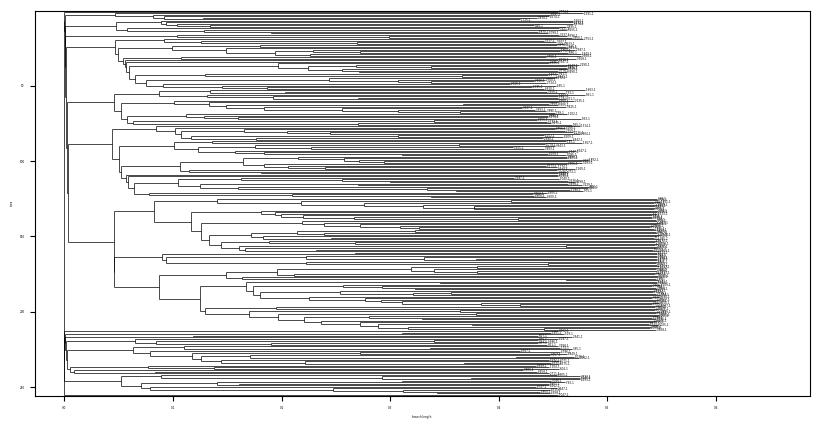

In [7]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['lines.linewidth'] = 0.5
matplotlib.rcParams['font.size'] = 2
fig,ax = plt.subplots(1,figsize=(10, 5))
Phylo.draw(tree, axes = ax, do_show=False)
plt.savefig("sp-lr-phylo-v3.pdf", format="pdf",bbox_inches="tight")

In [8]:
# Biased Sample
name = []
for seq in infectious_data['diseaseSeq']:
    name.append(seq.split('.')[-1])
dm = np.load('dm-v3.npy')
df = pd.DataFrame(data = dm, index=name, columns=name)

bias_sp_data = infectious_data[infectious_data['Reported']].reset_index()
selected_names = [seq.split('.')[-1] for seq in bias_sp_data['diseaseSeq'] if random.random() < 0.07]
df = df[df.index.isin(selected_names)]
df = df[selected_names]
df

,3077-1,448-1,3816-1,3910-1,4963-1,4710-1,3945-1,1661-1,4413-1,4125-1,...,375-1,968-1,838-1,963-1,400-1,1380-1,2719-1,1394-1,3282-1,2914-1
3077-1,0.000000,1.0,0.750000,0.750000,0.800000,0.800000,0.750000,1.00,0.800000,0.800000,...,1.000000,0.909091,1.000000,1.000000,1.000000,0.916667,1.0,0.900000,0.909091,0.916667
448-1,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.25,1.000000,1.000000,...,0.833333,1.000000,1.000000,1.000000,0.833333,1.000000,1.0,1.000000,1.000000,1.000000
3816-1,0.750000,1.0,0.000000,0.500000,0.833333,0.833333,0.800000,1.00,0.833333,0.600000,...,1.000000,0.916667,1.000000,1.000000,1.000000,0.727273,1.0,0.909091,0.916667,0.923077
3910-1,0.750000,1.0,0.500000,0.000000,0.833333,0.833333,0.800000,1.00,0.833333,0.600000,...,1.000000,0.916667,1.000000,1.000000,1.000000,0.833333,1.0,0.909091,0.916667,0.923077
4963-1,0.800000,1.0,0.833333,0.833333,0.000000,0.857143,0.833333,1.00,0.857143,0.857143,...,1.000000,0.833333,1.000000,1.000000,1.000000,0.928571,1.0,0.916667,0.923077,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380-1,0.916667,1.0,0.727273,0.833333,0.928571,0.928571,0.923077,1.00,0.928571,0.846154,...,1.000000,0.950000,1.000000,1.000000,1.000000,0.000000,1.0,0.947368,0.950000,0.952381
2719-1,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,...,1.000000,1.000000,0.947368,0.166667,1.000000,1.000000,0.0,1.000000,1.000000,1.000000
1394-1,0.900000,1.0,0.909091,0.909091,0.916667,0.916667,0.800000,1.00,0.916667,0.916667,...,1.000000,0.944444,1.000000,1.000000,1.000000,0.947368,1.0,0.000000,0.944444,0.947368
3282-1,0.909091,1.0,0.916667,0.916667,0.923077,0.833333,0.916667,1.00,0.923077,0.923077,...,1.000000,0.947368,1.000000,1.000000,1.000000,0.950000,1.0,0.944444,0.000000,0.950000


In [9]:
result_tree = neighbor_joining(df)
np.save('b-sp-lr-treedict-v3.npy',result_tree)

236
235
234
233
232
231
230
229
228
227
226
225
224
223
222
221
220
219
218
217
216
215
214
213
212
211
210
209
208
207
206
205
204
203
202
201
200
199
198
197
196
195
194
193
192
191
190
189
188
187
186
185
184
183
182
181
180
179
178
177
176
175
174
173
172
171
170
169
168
167
166
165
164
163
162
161
160
159
158
157
156
155
154
153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
122
121
120
119
118
117
116
115
114
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3


In [10]:
tree_dict = result_tree
root = list(tree_dict.keys())[-1]
root_clade = build_clade(root, tree_dict)
tree = Tree(root=root_clade)
phyloxml_tree = PhyloXML.Phylogeny.from_tree(tree)
Phylo.write([phyloxml_tree], 'b-sp-lr-tree.xml', 'phyloxml')

1

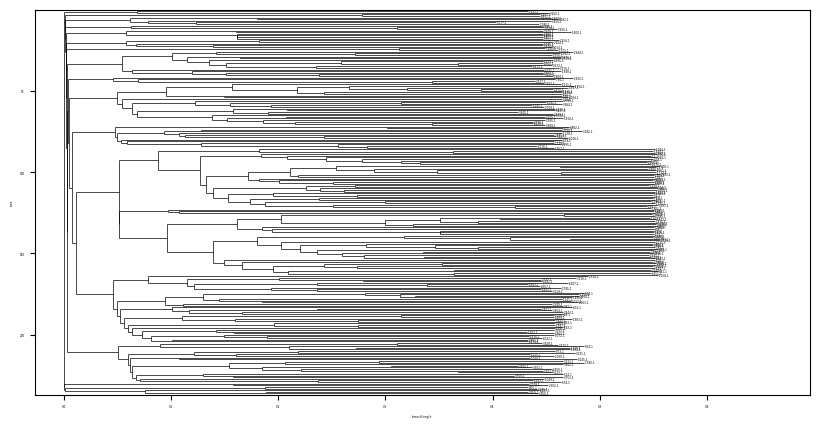

In [11]:
fig,ax = plt.subplots(1,figsize=(10, 5))
Phylo.draw(tree, axes = ax, do_show=False)
plt.savefig("b-sp-lr-phylo-v3.pdf", format="pdf",bbox_inches="tight")